In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# Loading data

In [4]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


In [41]:
df_train.shape

(74180464, 11)

In [7]:
df_test = pd.read_csv('test.csv')

In [8]:
df_test.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [42]:
df_test.shape

(6999251, 7)

In [9]:
df_sample_submission = pd.read_csv("sample_submission.csv")

In [10]:
df_sample_submission.head()

,id,Demanda_uni_equil
0,0,7
1,1,7
2,2,7
3,3,7
4,4,7


In [43]:
df_sample_submission.shape

(6999251, 2)

In [11]:
df_client_table = pd.read_csv("cliente_tabla.csv")

In [13]:
df_client_table.head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [44]:
df_client_table.shape

(935362, 2)

In [12]:
df_product_table = pd.read_csv('producto_tabla.csv')

In [14]:
df_product_table.head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [45]:
df_product_table.shape

(2592, 2)

In [15]:
df_town_state = pd.read_csv('town_state.csv')

In [16]:
df_town_state.head()

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


In [46]:
df_town_state.shape

(790, 3)

# Counting unique values in each column

In [19]:
df_train.describe()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
count,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07
mean,5.950021e+00,2.536509e+03,1.383181e+00,2.114855e+03,1.802119e+06,2.084081e+04,7.310163e+00,6.854452e+01,1.302577e-01,1.243248e+00,7.224564e+00
std,2.013175e+00,4.075124e+03,1.463266e+00,1.487744e+03,2.349577e+06,1.866392e+04,2.196734e+01,3.389795e+02,2.932320e+01,3.921552e+01,2.177119e+01
min,3.000000e+00,1.110000e+03,1.000000e+00,1.000000e+00,2.600000e+01,4.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,1.312000e+03,1.000000e+00,1.161000e+03,3.567670e+05,1.242000e+03,2.000000e+00,1.676000e+01,0.000000e+00,0.000000e+00,2.000000e+00
50%,6.000000e+00,1.613000e+03,1.000000e+00,1.286000e+03,1.193385e+06,3.054900e+04,3.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,3.000000e+00
75%,8.000000e+00,2.036000e+03,1.000000e+00,2.802000e+03,2.371091e+06,3.742600e+04,7.000000e+00,5.610000e+01,0.000000e+00,0.000000e+00,6.000000e+00
max,9.000000e+00,2.575900e+04,1.100000e+01,9.991000e+03,2.015152e+09,4.999700e+04,7.200000e+03,6.473600e+05,2.500000e+05,1.307600e+05,5.000000e+03


In [20]:
df_test.describe()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
count,6.999251e+06,6.999251e+06,6.999251e+06,6.999251e+06,6.999251e+06,6.999251e+06,6.999251e+06
mean,3.499625e+06,1.049446e+01,2.504463e+03,1.401874e+00,2.138014e+03,1.819128e+06,2.216307e+04
std,2.020510e+06,4.999694e-01,4.010228e+03,1.513404e+00,1.500392e+03,2.938910e+06,1.869816e+04
min,0.000000e+00,1.000000e+01,1.110000e+03,1.000000e+00,1.000000e+00,2.600000e+01,4.100000e+01
25%,1.749812e+06,1.000000e+01,1.311000e+03,1.000000e+00,1.159000e+03,3.558290e+05,1.242000e+03
50%,3.499625e+06,1.000000e+01,1.612000e+03,1.000000e+00,1.305000e+03,1.200109e+06,3.150700e+04
75%,5.249438e+06,1.100000e+01,2.034000e+03,1.000000e+00,2.804000e+03,2.387881e+06,4.093000e+04
max,6.999250e+06,1.100000e+01,2.575900e+04,1.100000e+01,9.950000e+03,2.015152e+09,4.999700e+04


In [21]:
df_train.Agencia_ID.value_counts().count()

552

(array([ 319.,   54.,   44.,   46.,   36.,   26.,   15.,    8.,    2.,    2.]),
 array([  3.10000000e+01,   8.06562000e+04,   1.61281400e+05,
          2.41906600e+05,   3.22531800e+05,   4.03157000e+05,
          4.83782200e+05,   5.64407400e+05,   6.45032600e+05,
          7.25657800e+05,   8.06283000e+05]),
 <a list of 10 Patch objects>)

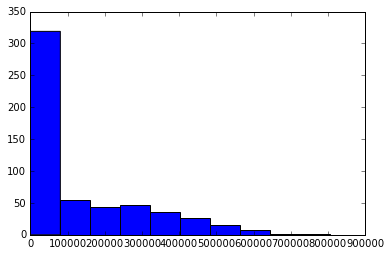

In [22]:
plt.hist(df_train.Agencia_ID.value_counts())

In [23]:
df_train.Canal_ID.value_counts()

1     67435217
4      3757773
11      982295
2       839496
7       671128
6       281389
5       145818
8        66970
9          378
Name: Canal_ID, dtype: int64

In [24]:
df_train.Ruta_SAK.value_counts().count()

3603

(array([ 3128.,   219.,   109.,    68.,    31.,    20.,     9.,    10.,
            5.,     4.]),
 array([  1.00000000e+00,   4.61927000e+04,   9.23844000e+04,
          1.38576100e+05,   1.84767800e+05,   2.30959500e+05,
          2.77151200e+05,   3.23342900e+05,   3.69534600e+05,
          4.15726300e+05,   4.61918000e+05]),
 <a list of 10 Patch objects>)

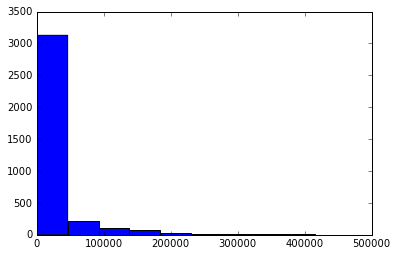

In [25]:
plt.hist(df_train.Ruta_SAK.value_counts())

In [27]:
df_train.Ruta_SAK.value_counts().count()

3603

In [28]:
df_train.Ruta_SAK.value_counts()

1201    461918
1203    438474
1202    427767
1204    418744
1205    409597
1206    391245
1207    383959
1213    383761
1208    369824
1212    359986
1103    357276
1221    355455
1101    352677
1102    350716
1214    346421
1211    342822
1104    330540
1215    323577
1210    323423
1222    319514
1209    315325
1216    303376
1223    300478
1224    298955
1105    298796
1225    285764
2802    280893
1217    280339
1220    276381
1106    270827
         ...  
9766         1
9104         1
9105         1
9759         1
9757         1
9124         1
9745         1
9810         1
9022         1
8763         1
8867         1
8773         1
8774         1
9844         1
8771         1
8813         1
8843         1
8849         1
8860         1
1099         1
8950         1
1100         1
8883         1
8910         1
8911         1
8913         1
8927         1
9819         1
8937         1
9985         1
Name: Ruta_SAK, dtype: int64

In [30]:
df_train.Cliente_ID.value_counts().count()

880604

(array([  8.80603000e+05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   1.24068000e+04,   2.48126000e+04,
          3.72184000e+04,   4.96242000e+04,   6.20300000e+04,
          7.44358000e+04,   8.68416000e+04,   9.92474000e+04,
          1.11653200e+05,   1.24059000e+05]),
 <a list of 10 Patch objects>)

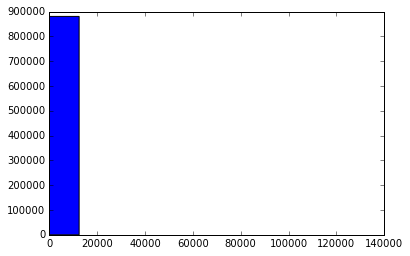

In [31]:
plt.hist(df_train.Cliente_ID.value_counts())

In [32]:
df_train.Producto_ID.value_counts().count()

1799

(array([  1.71900000e+03,   3.60000000e+01,   1.60000000e+01,
          5.00000000e+00,   6.00000000e+00,   6.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([  1.00000000e+00,   2.14666400e+05,   4.29331800e+05,
          6.43997200e+05,   8.58662600e+05,   1.07332800e+06,
          1.28799340e+06,   1.50265880e+06,   1.71732420e+06,
          1.93198960e+06,   2.14665500e+06]),
 <a list of 10 Patch objects>)

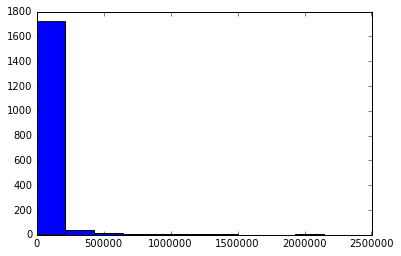

In [33]:
plt.hist(df_train.Producto_ID.value_counts())

# The Venta_uni_hoy column is filled

In [34]:
df2 = df_train[df_train.Venta_uni_hoy > 0]

In [35]:
df2.shape

(73877905, 11)

In [36]:
73877905/74180464

0.9959213115733544

# The Dev_uni_proximani_proxima column is almost empty

In [38]:
df = df_train[df_train.Dev_uni_proxima >0]

In [39]:
df.shape

(2544461, 11)

In [40]:
2544461/74180464

0.034300958268473486

#  Columns in the data sets

In [47]:
df_train.columns

Index(['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima',
       'Dev_proxima', 'Demanda_uni_equil'],
      dtype='object')

In [48]:
df_test.columns

Index(['id', 'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID'],
      dtype='object')

#  Examine how many records exist for one agency on one certain week.

In [49]:
df_s = df_train[(df_train.Agencia_ID == 1110) & (df_train.Producto_ID==1212)]

In [53]:
df_s.head(20)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
51,3,1110,7,3301,73838,1212,3,25.14,0,0.0,3
62,3,1110,7,3301,73844,1212,2,16.76,0,0.0,2
92,3,1110,7,3301,198780,1212,4,33.52,0,0.0,4
167,3,1110,7,3301,1159580,1212,3,25.14,0,0.0,3
187,3,1110,7,3301,1163700,1212,2,16.76,0,0.0,2
208,3,1110,7,3301,1255667,1212,4,33.52,0,0.0,4
232,3,1110,7,3301,1307034,1212,1,8.38,0,0.0,1
268,3,1110,7,3301,1457784,1212,2,16.76,0,0.0,2
280,3,1110,7,3301,1603500,1212,2,16.76,0,0.0,2


In [52]:
df_s.count()

Semana               1217
Agencia_ID           1217
Canal_ID             1217
Ruta_SAK             1217
Cliente_ID           1217
Producto_ID          1217
Venta_uni_hoy        1217
Venta_hoy            1217
Dev_uni_proxima      1217
Dev_proxima          1217
Demanda_uni_equil    1217
dtype: int64

# Prediction using the shared columns

In [54]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



In [55]:
df_train_selected = df_train[['Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID','Producto_ID','Demanda_uni_equil']]

In [56]:
df_train_selected.head()

,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil
0,1110,7,3301,15766,1212,3
1,1110,7,3301,15766,1216,4
2,1110,7,3301,15766,1238,4
3,1110,7,3301,15766,1240,4
4,1110,7,3301,15766,1242,3


In [57]:
y_train = df_train_selected.pop("Demanda_uni_equil")

In [ ]:
x_train = df_train_selected

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)